# Slope Prediction for Feed-Forward Process Control (with time)


## Set up
import neccessary packages and set home directory. This will help with importing the data files

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
import sys
warnings.filterwarnings('ignore')

home_dir = os.getcwd().split('/notebooks')[0]
sys.path.append(home_dir)
home_dir

'/scratch/garrettroell/machine_learning_clostridium'

## Get Starting Data
This data was generated from the data processing notebook

In [3]:
smooth_data = pd.read_csv(f'{home_dir}/processed_data/smooth_data.csv')
smooth_data.set_index(['composition','trial'], drop=True, inplace=True)

Check that imports worked correctly

In [4]:
print(f'Shape of the smooth data: {smooth_data.shape[0]} rows by {smooth_data.shape[1]} columns')

Shape of the smooth data: 856 rows by 25 columns


## Create train/validation/test data sets
Train and validation data comes from compostions 1-7.<br>
test data comes from compostions 8, 9, and 10.

In [5]:
train_validation_data = smooth_data.loc[[1,2,3,4,5,6,7]]
print(f'Shape of the train_validation data: {train_validation_data.shape[0]} rows by {train_validation_data.shape[1]} columns')
test_data = smooth_data.loc[[8,9,10]]
print(f'Shape of the test data: {test_data.shape[0]} rows by {test_data.shape[1]} columns')

Shape of the train_validation data: 550 rows by 25 columns
Shape of the test data: 306 rows by 25 columns


In [6]:
train_validation_data.head()

time   CO    CO2     H2    acetate   biomass   butanol  \
composition trial                                                           
1           1       0.2  0.5  0.375  0.125  19.831073  0.410803  0.028316   
            1       0.3  0.5  0.375  0.125  22.196249  0.403602  0.031357   
            1       0.4  0.5  0.375  0.125  25.293925  0.403709  0.028700   
            1       0.5  0.5  0.375  0.125  29.005157  0.406214  0.031038   
            1       0.6  0.5  0.375  0.125  32.899333  0.410848  0.043533   

                   butyrate    ethanol  flow rate  ...  prev_acetate  \
composition trial                                  ...                 
1           1      0.051013  15.144135       20.0  ...     18.001195   
            1      0.050367  14.522308       20.0  ...     19.831073   
            1      0.035514  13.956015       20.0  ...     22.196249   
            1      0.041123  13.322048       20.0  ...     25.293925   
            1      0.081221  12.648214       20.0  ...     29.005157   

                   prev_biomass  prev_butanol  prev_butyrate  prev_ethanol  \
composition trial                                                            
1           1          0.421076      0.028260       0.061033      0.028260   
            1          0.410803      0.028316       0.051013      0.028316   
            1          0.403602      0.031357       0.050367      0.031357   
            1          0.403709      0.028700       0.035514      0.028700   
            1          0.406214      0.031038       0.041123      0.031038   

                   prev_acetate_Δ  prev_biomass_Δ  prev_butanol_Δ  \
composition trial                                                   
1           1           10.961665       -0.084697       -0.015584   
            1           18.298778       -0.102733        0.000561   
            1           23.651756       -0.072009        0.030416   
            1           30.976760        0.001068       -0.026579   
            1           37.112317        0.025050        0.023385   

                   prev_butyrate_Δ  prev_ethanol_Δ  
composition trial                                   
1           1            -0.144950       -0.144950  
            1            -0.100208       -0.100208  
            1            -0.006462       -0.006462  
            1            -0.148525       -0.148525  
            1             0.056090        0.056090  

[5 rows x 25 columns]

## Define a function that generates the X array and y array for ML model training

The parameter 'input_data' is used to specify whether raw data or the polynomial smoothed data will be used to train the model <br>
The parameter 'conditions_to_include' is a list of the conditions to include in the returned arrays

In [7]:
def get_X_y_arrays(data):

    data_copy = data.copy()
    data_copy.reset_index(inplace=True)
    X = data_copy [['time', 'acetate', 'biomass', 'butanol', 'butyrate', 'ethanol', 'CO', 'CO2', 'H2', 'flow rate']]
    y = data_copy [['acetate_Δ', 'biomass_Δ', 'butanol_Δ', 'butyrate_Δ', 'ethanol_Δ']]
 
    return np.array(X), np.array(y)

Apply to train/validation data and test data set

In [8]:
X_train_validation, y_train_validation = get_X_y_arrays(train_validation_data)
X_test, y_test = get_X_y_arrays(test_data)

print(f'Shape of the train_validation X array: {X_train_validation.shape[0]} rows by {X_train_validation.shape[1]} columns')
print(f'Shape of the train_validation y array: {y_train_validation.shape[0]} rows by {y_train_validation.shape[1]} columns')
print(f'Shape of the test X array: {X_test.shape[0]} rows by {X_test.shape[1]} columns')
print(f'Shape of the test y array: {y_test.shape[0]} rows by {y_test.shape[1]} columns')

Shape of the train_validation X array: 550 rows by 10 columns
Shape of the train_validation y array: 550 rows by 5 columns
Shape of the test X array: 306 rows by 10 columns
Shape of the test y array: 306 rows by 5 columns


## Perform train_test_split on train/validation data

In [9]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25, random_state=42)
print(f'Shape of the train X array: {X_train.shape[0]} rows by {X_train.shape[1]} columns')
print(f'Shape of the train y array: {y_train.shape[0]} rows by {y_train.shape[1]} columns')
print(f'Shape of the validation  X array: {X_validation.shape[0] } rows by {X_validation.shape[1] } columns')
print(f'Shape of the validation  y array: {y_validation.shape[0] } rows by {y_validation.shape[1] } columns')

Shape of the train X array: 412 rows by 10 columns
Shape of the train y array: 412 rows by 5 columns
Shape of the validation  X array: 138 rows by 10 columns
Shape of the validation  y array: 138 rows by 5 columns


Save y_train and y_validation as dataframes. These will be used for prediction evaluation

In [10]:
train_data = pd.DataFrame(data=y_train, columns=['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'])
validation_data = pd.DataFrame(data=y_validation, columns=['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'])
print(f'Shape of the train data: {train_data.shape[0]} rows by {train_data.shape[1]} columns')
print(f'Shape of the validation  data: {validation_data.shape[0] } rows by {validation_data.shape[1] } columns')

Shape of the train data: 412 rows by 5 columns
Shape of the validation  data: 138 rows by 5 columns


## Train 25 different models using 5 algorithms for each of the 5 outputs
algorithms = gradient boosting, random forest, support vector, neural net, lasso <br>
outputs = acetate, biomass, butanol, butyrate, ethanol

In [12]:
from machine_learning.model_selector import model_selector

trained_models = {}
for regressor in ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']:
    print(regressor)
    model = model_selector(regressor)
    trained_models[regressor] = model.fit(X_train, y_train)

gradient boosting
random forest
support vector
neural net
lasso
gaussian process


## Get model predictions for train, validation, and test data sets
Define a function that takes in an X array and outputs a dictionary of prediction dataframes

In [13]:
def get_model_predictions(X_array):
    prediction_dfs = {}
    for regressor in ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']:
        model = trained_models[regressor]
        prediction_array = model.predict(X_array)
        prediction_dfs[regressor] = pd.DataFrame(data=prediction_array, columns=['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'])
    return prediction_dfs

Apply function to get prediction dataframe 

In [14]:
train_predictions = get_model_predictions(X_train)
validation_predictions = get_model_predictions(X_validation)
test_predictions = get_model_predictions(X_test)

display(train_predictions['gradient boosting'].head())
display(validation_predictions['lasso'].head())
display(test_predictions['random forest'].head())

,acetate,biomass,butanol,butyrate,ethanol
0,-3.580698,-0.006355,3.387690,2.362784,22.760597
1,7.815833,0.063617,0.844330,1.696307,7.923823
2,-3.839749,-0.038951,3.154115,-0.754611,15.997437
3,-5.030142,-0.007562,2.111106,2.335168,15.768334
4,-13.657682,-0.000121,3.787974,1.869719,14.297802


,acetate,biomass,butanol,butyrate,ethanol
0,-20.952164,0.036627,7.729759,2.727491,19.305151
1,6.531229,0.033674,3.053655,0.404233,4.940399
2,7.197991,0.012680,1.562200,3.086347,1.735632
3,-2.029133,0.004202,8.576687,-6.019141,9.380309
4,0.277412,0.032837,3.384092,3.012818,6.779184


,acetate,biomass,butanol,butyrate,ethanol
0,35.802847,-0.014789,0.263073,0.421651,0.537558
1,37.570989,0.001243,0.258764,0.402696,0.601454
2,38.400730,0.033675,0.259473,0.456042,0.719160
3,37.751094,0.047637,0.287967,0.529130,0.789506
4,37.235824,0.062292,0.502685,0.578668,1.456450


## Evaluate Model Fits
Define functions to evaluated r squared and normalized root mean squared error

In [15]:
from scipy.stats import linregress
from sklearn import metrics

def get_pearson_r2 (measured_list, predicted_list):
    # slope, intercept, r_value, p_value, std_err
    _, _, r_value, _, _ = linregress(measured_list, predicted_list)
    r2 = (r_value**2)
    return r2

def get_norm_rmse (measured_list, predicted_list):
    mse = metrics.mean_squared_error(measured_list, predicted_list)
    rmse = (mse**0.5)
    return rmse/(max(measured_list)-min(measured_list))

Define a function to evaluate the r squared value for each model and data set for a given output (acetate, biomass, ...)

In [20]:
def evaluate_models(output, metric):
    data = {}
    for dataset in ['Train', 'validation', 'test']:
        data[dataset] = []
        for model in ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']:
            
            if dataset == 'Train':
                prediction_values = train_predictions[model][output]
                measured_values = train_data[output]
            elif dataset == 'validation':
                prediction_values = validation_predictions[model][output]
                measured_values = validation_data[output]
            elif dataset == 'test':
                prediction_values = test_predictions[model][output]
                measured_values = test_data[output]
            else:
                print('Something went wrong')
                
            if metric == 'r2':
                data[dataset].append(get_pearson_r2(measured_values, prediction_values))
            elif metric == 'norm_rmse':
                data[dataset].append(get_norm_rmse(measured_values, prediction_values))
            else:
                print('Something went wrong')
                
    data_table = pd.DataFrame.from_dict(data)
    data_table[f'{output} {metric}'] = ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']
    data_table.set_index(f'{output} {metric}', inplace=True, drop=True)
        
    return data_table

## Plot evaluation metrics
Plot r$^2$ values first

Apply function to all outputs and metrics (Not needed, but the details are there if 

In [46]:
plt.rcParams.update({'font.size': 11.5})
def plot_evaluation_metrics(output, metric):
    labels = ['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']
    train_data = list(evaluate_models(output, metric)['Train'])
    validation_data = list(evaluate_models(output, metric)['validation'])
    test_data = list(evaluate_models(output, metric)['test'])

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,5))
    rects1 = ax.bar(x - width, train_data,      width, label='Train')
    rects2 = ax.bar(x,         validation_data,       width, label='validation')
    rects3 = ax.bar(x + width, test_data, width, label='test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} values for {output} slope predictions (with time as a feature)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.yscale('log')
    ax.legend()


    fig.tight_layout()
    plt.savefig(f'{home_dir}/figures/slope_figures_with_time/{metric}_{output}_slope_bar_graph_without_time.png', dpi=100)
    plt.show()

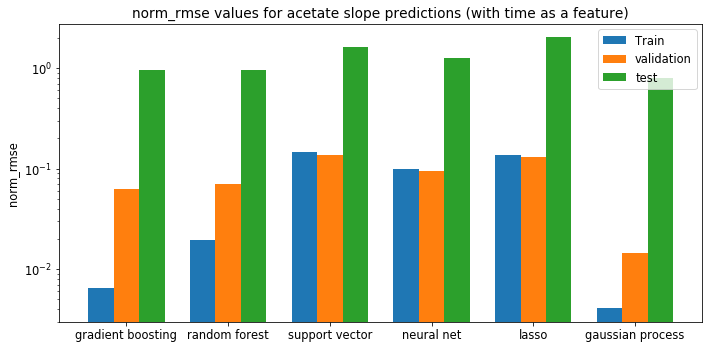

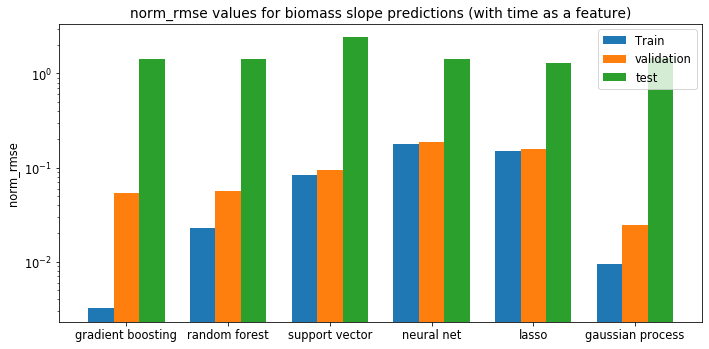

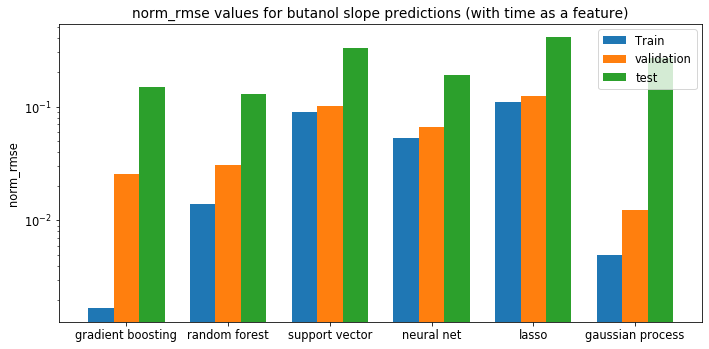

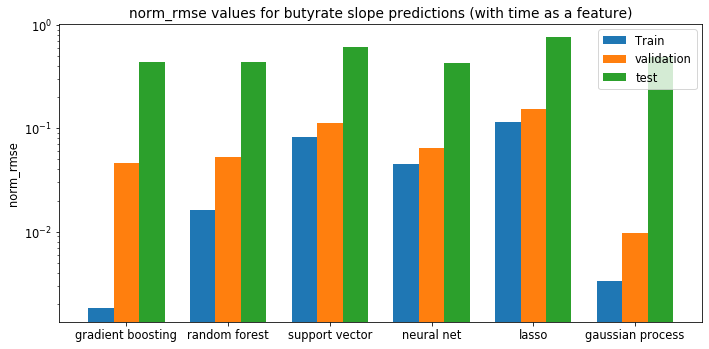

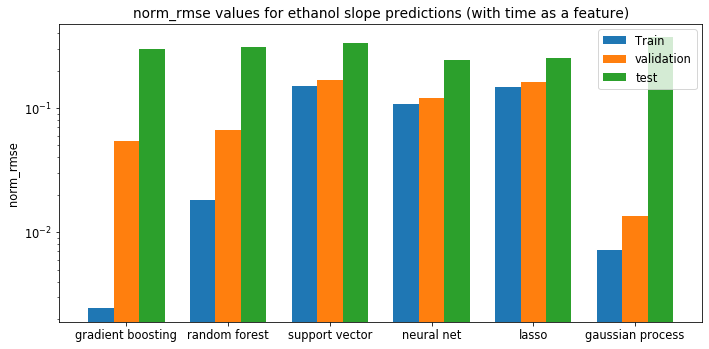

In [47]:
for output in ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']:
    plot_evaluation_metrics(output, 'norm_rmse')

Plot normalized mean squared error

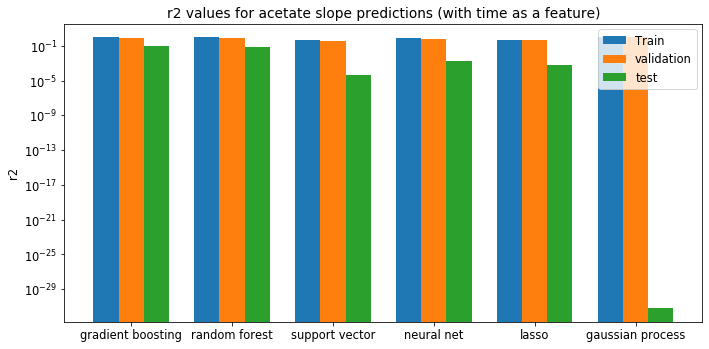

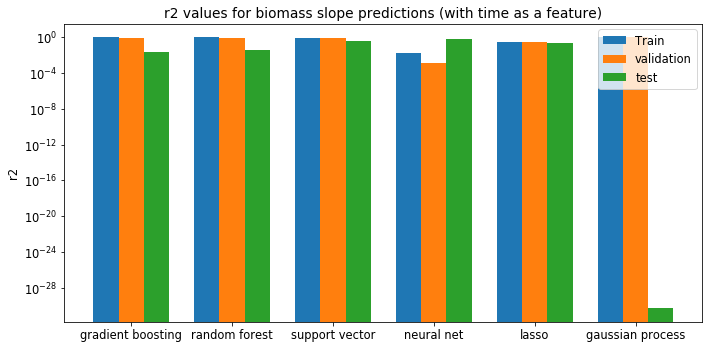

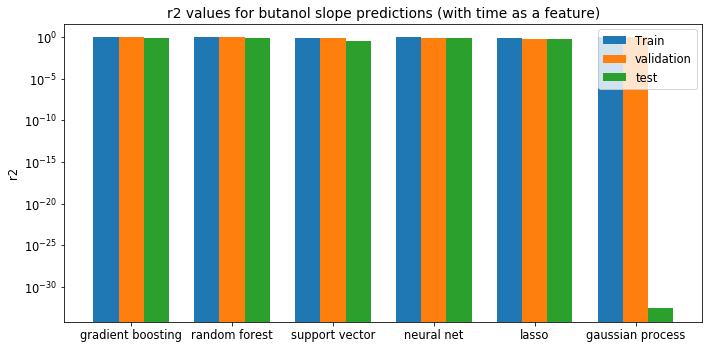

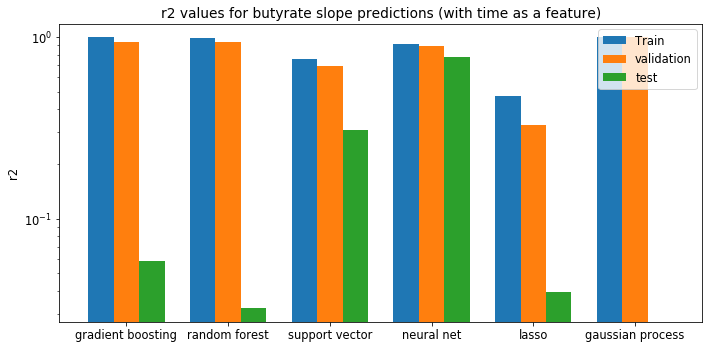

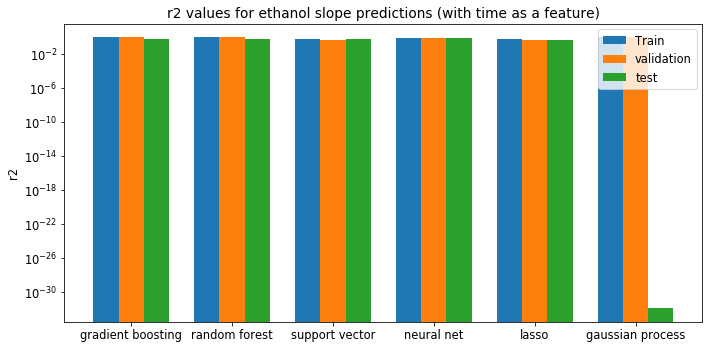

In [45]:
for output in ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']:
    plot_evaluation_metrics(output, 'r2')

## Plot scatterplots of slope fits
Plot alcohols

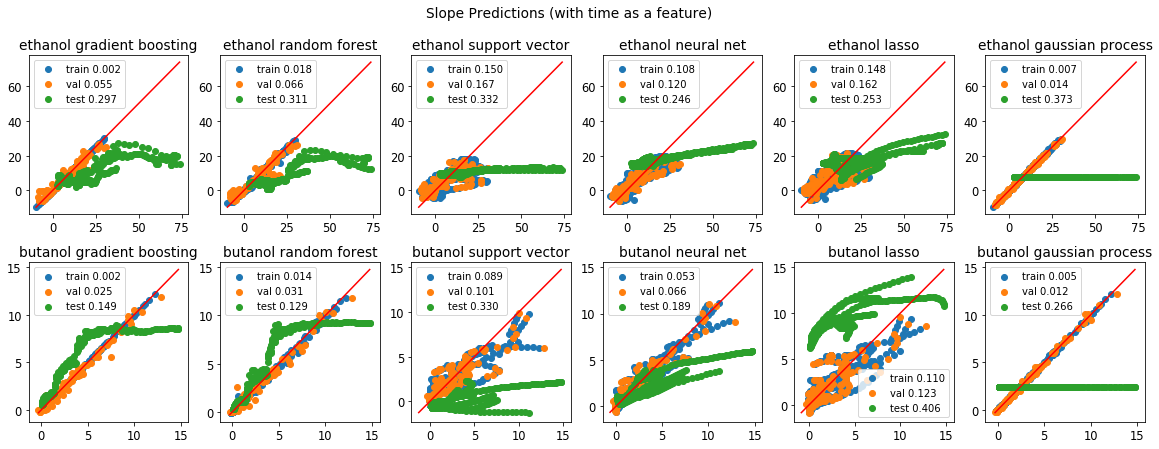

In [42]:
fig, ax = plt.subplots(2, 6, figsize=(20, 6.75))
plt.subplots_adjust(hspace=.3)
fig.suptitle(f'Slope Predictions (with time as a feature)')

for x, output in enumerate(['ethanol', 'butanol']):
    for y, model in enumerate(['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']):
        ax[x, y].title.set_text(f'{output} {model}')
        
        
        
        ax[x, y].scatter(train_data[output], train_predictions[model][output], label=f'train {get_norm_rmse(train_data[output], train_predictions[model][output]):.3f}')
        ax[x, y].scatter(validation_data[output], validation_predictions[model][output], label=f'val {get_norm_rmse(validation_data[output], validation_predictions[model][output]):.3f}')
        ax[x, y].scatter(test_data[output], test_predictions[model][output], label=f'test {get_norm_rmse(test_data[output], test_predictions[model][output]):.3f}')
        
        minimum = min(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output], 
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))

        maximum = max(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output],
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))
        
        
        ax[x, y].legend(prop={'size': 10})
        ax[x, y].plot([minimum, maximum], [minimum, maximum], 'r') #row=0, col=0

plt.savefig(f'{home_dir}/figures/slope_figures_with_time/slope_scatterplots_with_time.png', dpi=100)
plt.show()

Plot others

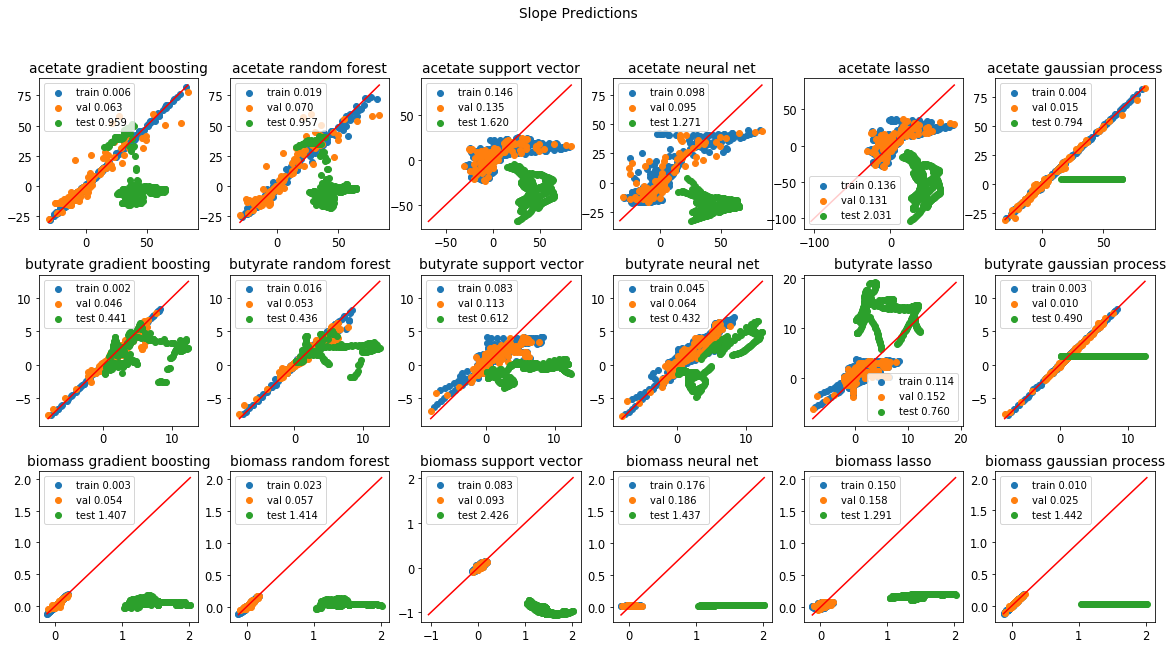

In [25]:

fig, ax = plt.subplots(3, 6, figsize=(20, 10))
plt.subplots_adjust(hspace=.3)
fig.suptitle(f'Slope Predictions')

for x, output in enumerate(['acetate', 'butyrate', 'biomass']):
    for y, model in enumerate(['gradient boosting', 'random forest', 'support vector', 'neural net', 'lasso', 'gaussian process']):
        ax[x, y].title.set_text(f'{output} {model}')
        
        
        
        ax[x, y].scatter(train_data[output], train_predictions[model][output], label=f'train {get_norm_rmse(train_data[output], train_predictions[model][output]):.3f}')
        ax[x, y].scatter(validation_data[output], validation_predictions[model][output], label=f'val {get_norm_rmse(validation_data[output], validation_predictions[model][output]):.3f}')
        ax[x, y].scatter(test_data[output], test_predictions[model][output], label=f'test {get_norm_rmse(test_data[output], test_predictions[model][output]):.3f}')
        
        minimum = min(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output], 
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))

        maximum = max(pd.concat([
            test_data[output],
            validation_data[output],
            train_data[output],
            test_predictions[model][output],
            validation_predictions[model][output],
            train_predictions[model][output]
        ], axis=0))
        
        
        ax[x, y].legend(prop={'size': 10})
        ax[x, y].plot([minimum, maximum], [minimum, maximum], 'r') #row=0, col=0

# plt.savefig(f'{home_dir}/figures/slope_figures_with_time/slope_scatterplots_without_time.png', dpi=100)
plt.show()

## Feature Importance
Define a function to get feature importances

In [26]:
def get_feature_importances(model):
    outputs = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']
    features = ['time', 'acetate', 'biomass', 'butanol', 'butyrate', 'ethanol', 'CO', 'CO2', 'H2', 'flow rate']

    array_list = []

    for i in range(5):
        feature_importance_array = model.estimators_[i].steps[1][1].best_estimator_.feature_importances_
        array_list.append(list(feature_importance_array))
    df = pd.DataFrame(array_list, columns = features, index = outputs)  
    return df

Get feature importance values

In [27]:
model_list = [
    trained_models['gradient boosting'],
    trained_models['random forest'],
    ]

for model in model_list:
    display(get_feature_importances(model))

,time,acetate,biomass,butanol,butyrate,ethanol,CO,CO2,H2,flow rate
acetate,0.014600,0.063714,0.143587,0.625183,0.050202,0.085068,0.001189,0.012350,0.003669,4.376932e-04
biomass,0.301957,0.319969,0.101212,0.057081,0.068111,0.136320,0.002600,0.004950,0.004920,2.879963e-03
butanol,0.010098,0.040647,0.051996,0.701820,0.019583,0.027248,0.005966,0.007761,0.134872,9.411632e-06
butyrate,0.055190,0.231885,0.150595,0.119621,0.109845,0.301861,0.005193,0.008258,0.017551,4.704794e-07
ethanol,0.079750,0.046844,0.223496,0.053020,0.022921,0.548541,0.002220,0.019560,0.003538,1.088392e-04


,time,acetate,biomass,butanol,butyrate,ethanol,CO,CO2,H2,flow rate
acetate,0.017858,0.065002,0.127006,0.632868,0.069088,0.066127,0.002901,0.006297,0.004715,0.008137
biomass,0.278744,0.320115,0.106121,0.060809,0.086314,0.115734,0.015818,0.006636,0.008433,0.001277
butanol,0.016120,0.044095,0.056398,0.693707,0.020414,0.027913,0.002279,0.002976,0.134829,0.001268
butyrate,0.102848,0.139051,0.124518,0.181591,0.078993,0.320186,0.003159,0.006264,0.043279,0.000110
ethanol,0.069663,0.046979,0.207003,0.061110,0.028623,0.557157,0.003417,0.018625,0.007162,0.000261


Define a function to plot feature importance

In [33]:
def plot_feature_importance_metabolites(model_name):
    model = trained_models[model_name]
    data = get_feature_importances(model)
    ethanol_data = data.iloc[4]
    butanol_data = data.iloc[2]
    
    ethanol_data = ethanol_data[:5]
    butanol_data = butanol_data[:5]
    
    labels = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol'] #, 'CO', 'CO2', 'H2', 'flow rate']
    
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(8,5))
    rects5 = ax.bar(x - 0.5*width, ethanol_data , width, label='Ethanol Rate')
    rects3 = ax.bar(x + 0.5*width , butanol_data , width, label='Butanol Rate')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'Importance')
    ax.set_yscale('log')
    ax.set_title(f'Feature Importance for {model_name} Slope Predictions (with time)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    
    fig.tight_layout()
    plt.savefig(f'{home_dir}/figures/slope_figures_with_time/slope_feature_importance_{model_name}_metabolites_with_time.png', dpi=100)
    plt.show()

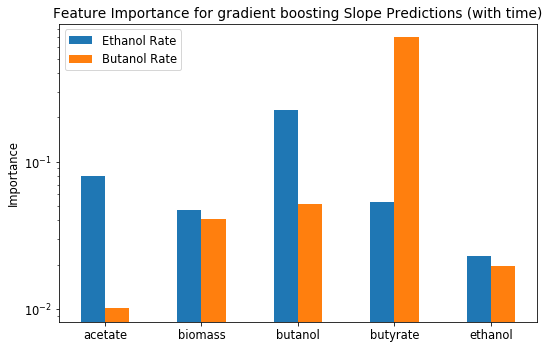

In [34]:
plot_feature_importance_metabolites('gradient boosting')

Plot feature importance gradient boosting and random forest

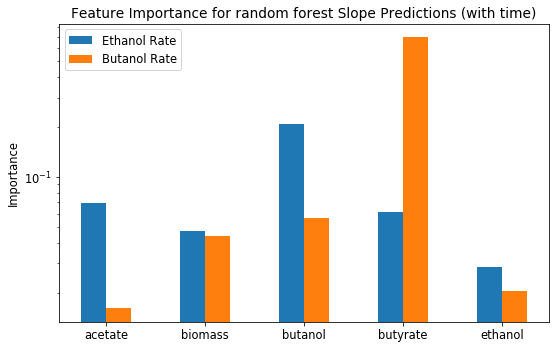

In [35]:
plot_feature_importance_metabolites('random forest')

In [38]:
def plot_feature_importance_gases(model_name):
    model = trained_models[model_name]
    data = get_feature_importances(model)
    
    ethanol_data = data.iloc[4]
    butanol_data = data.iloc[2]

    ethanol_data = ethanol_data[5:]
    butanol_data = butanol_data[5:]
    
    labels = ['time', 'CO', 'CO2', 'H2', 'flow rate']
    
    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,5))
    rects5 = ax.bar(x - 0.5*width, ethanol_data , width, label='Ethanol Rate')
    rects3 = ax.bar(x + 0.5*width , butanol_data , width, label='Butanol Rate')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'Importance')
    ax.set_yscale('log')
    ax.set_title(f'Feature Importance for {model_name} Slope Predictions (with time)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    fig.tight_layout()
    plt.savefig(f'{home_dir}/figures/slope_figures_with_time/slope_feature_importance_gases_{model_name}.png', dpi=100)
    plt.show()

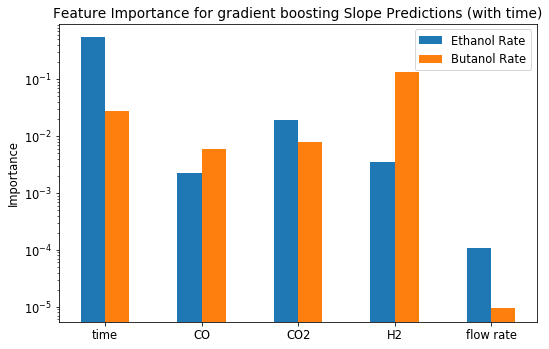

In [39]:
plot_feature_importance_gases('gradient boosting')

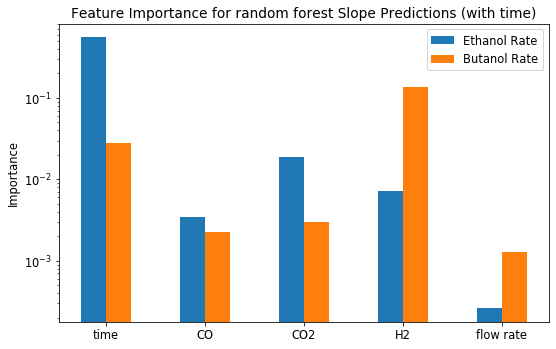

In [40]:
plot_feature_importance_gases('random forest') 